In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets

In [3]:
data = pd.read_csv("../data/xigua4.0.csv", index_col='编号')
data

,密度,含糖率,好瓜
编号,,,
1,0.697,0.460,1
2,0.774,0.376,1
3,0.634,0.264,1
4,0.608,0.318,1
5,0.556,0.215,1
6,0.403,0.237,1
7,0.481,0.149,1
8,0.437,0.211,1
9,0.666,0.091,-1


In [4]:
import sklearn.cluster as cluster
cluster.__all__

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'OPTICS',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'KMeans',
 'BisectingKMeans',
 'FeatureAgglomeration',
 'MeanShift',
 'MiniBatchKMeans',
 'SpectralClustering',
 'affinity_propagation',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'kmeans_plusplus',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree',
 'SpectralBiclustering',
 'SpectralCoclustering']

In [5]:
import sklearn.mixture as mixture
mixture.__all__

['GaussianMixture', 'BayesianGaussianMixture']

In [8]:
model = cluster.KMeans()
data_kmeans = model.fit_predict(data[['密度','含糖率']])
data_kmeans

array([2, 7, 5, 5, 5, 1, 1, 1, 0, 6, 3, 3, 0, 5, 4, 0, 0, 1, 6, 6, 7, 7,
       4, 4, 4, 2, 4, 4, 2, 4])

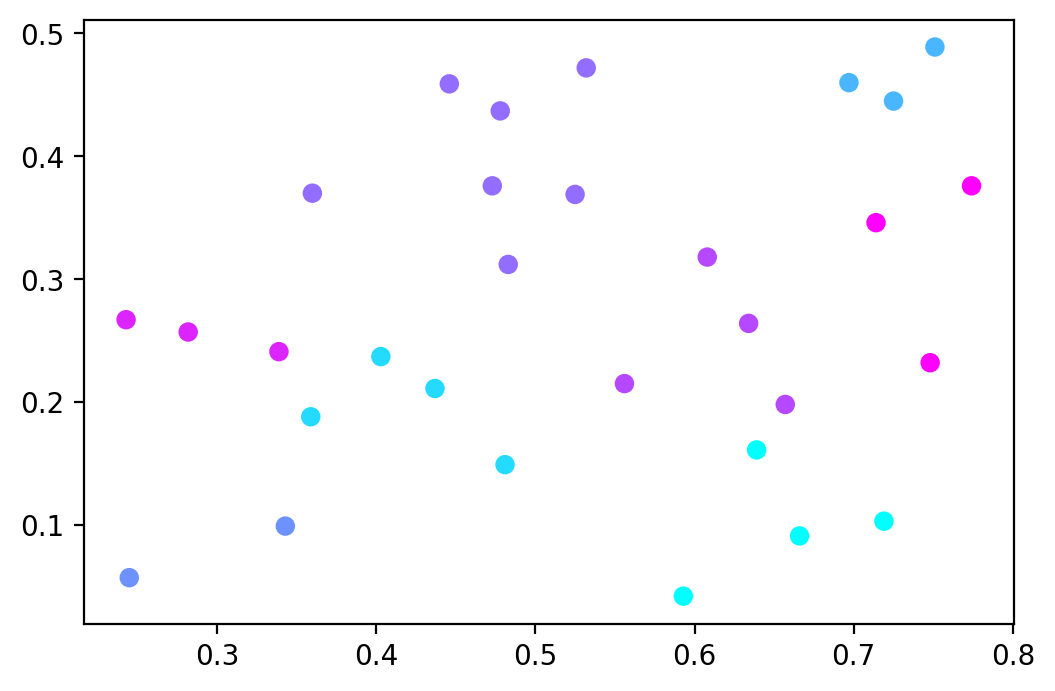

In [11]:
plt.rcParams['figure.dpi']=200
plt.scatter(data[['密度']], data[['含糖率']], c=data_kmeans, cmap='cool')
plt.show()

In [13]:
scale = 100
x = np.linspace(0, 1, scale + 1)
y = np.linspace(0, 1, scale + 1)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_input

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [0.98, 1.  ],
       [0.99, 1.  ],
       [1.  , 1.  ]])

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn

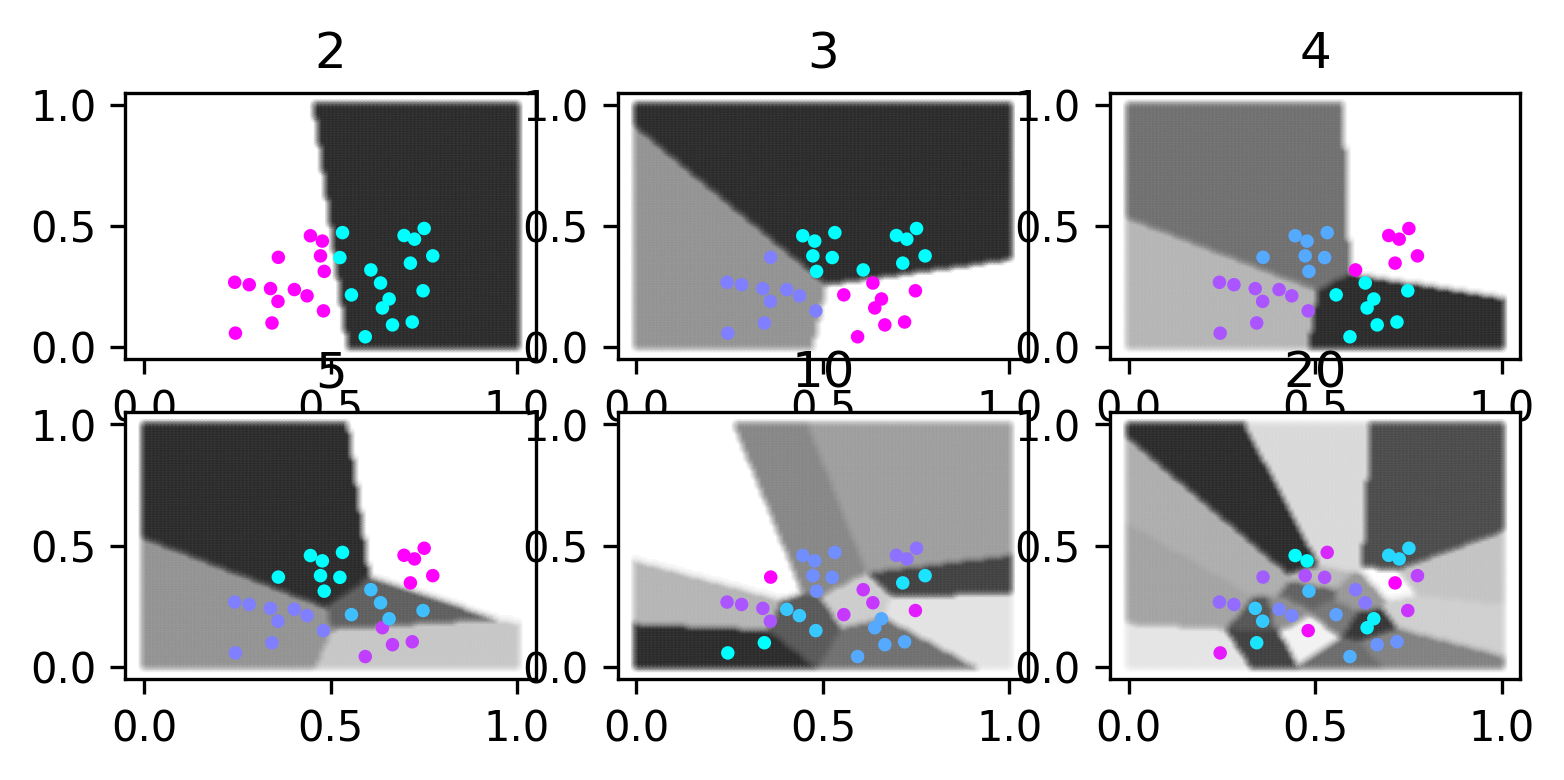

In [20]:
plt.rcParams['figure.dpi']=300
for cluster_i,draw_i in zip([2,3,4,5,10,20],range(1, 1000)):
    model = cluster.KMeans(n_clusters=cluster_i)
    data_kmeans = model.fit_predict(data[['密度','含糖率']])
    disp_predict = model.predict(disp_input)
    plt.subplot(3,3,draw_i)
    plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=3)
    plt.scatter(data[['密度']], data[['含糖率']], c=data_kmeans, cmap='cool', s=5)
    plt.title(cluster_i)
plt.show()


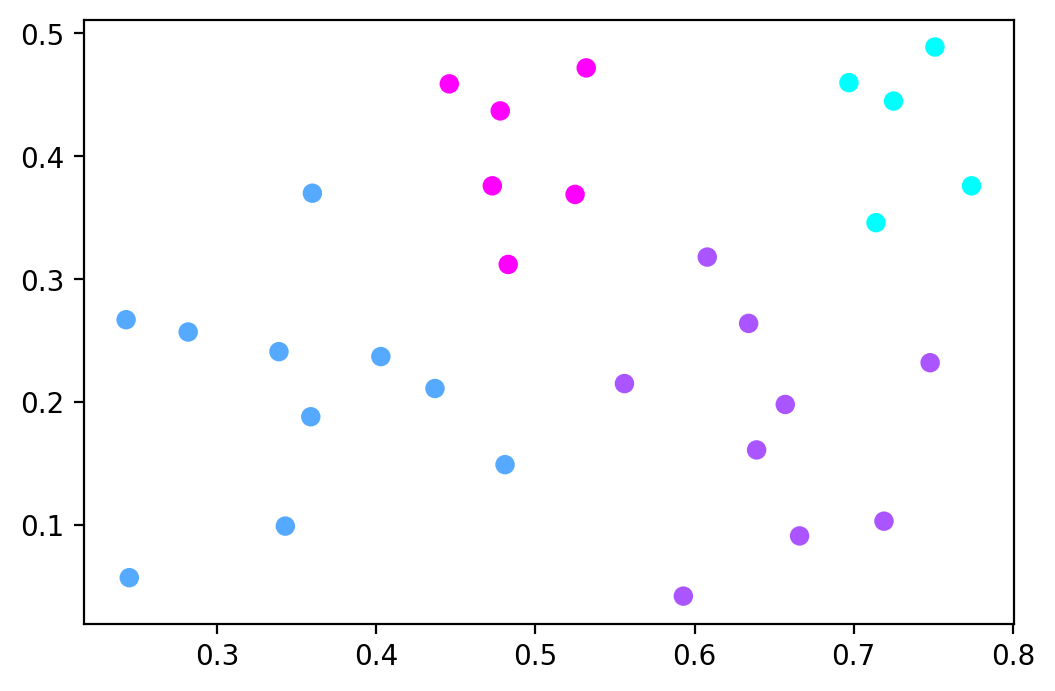

In [24]:
import sklearn.mixture as mixture
model = mixture.GaussianMixture(n_components=4)
data_gs = model.fit_predict(data[['密度','含糖率']])
plt.rcParams['figure.dpi']=200
plt.scatter(data[['密度']], data[['含糖率']], c=data_gs, cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Gaussia

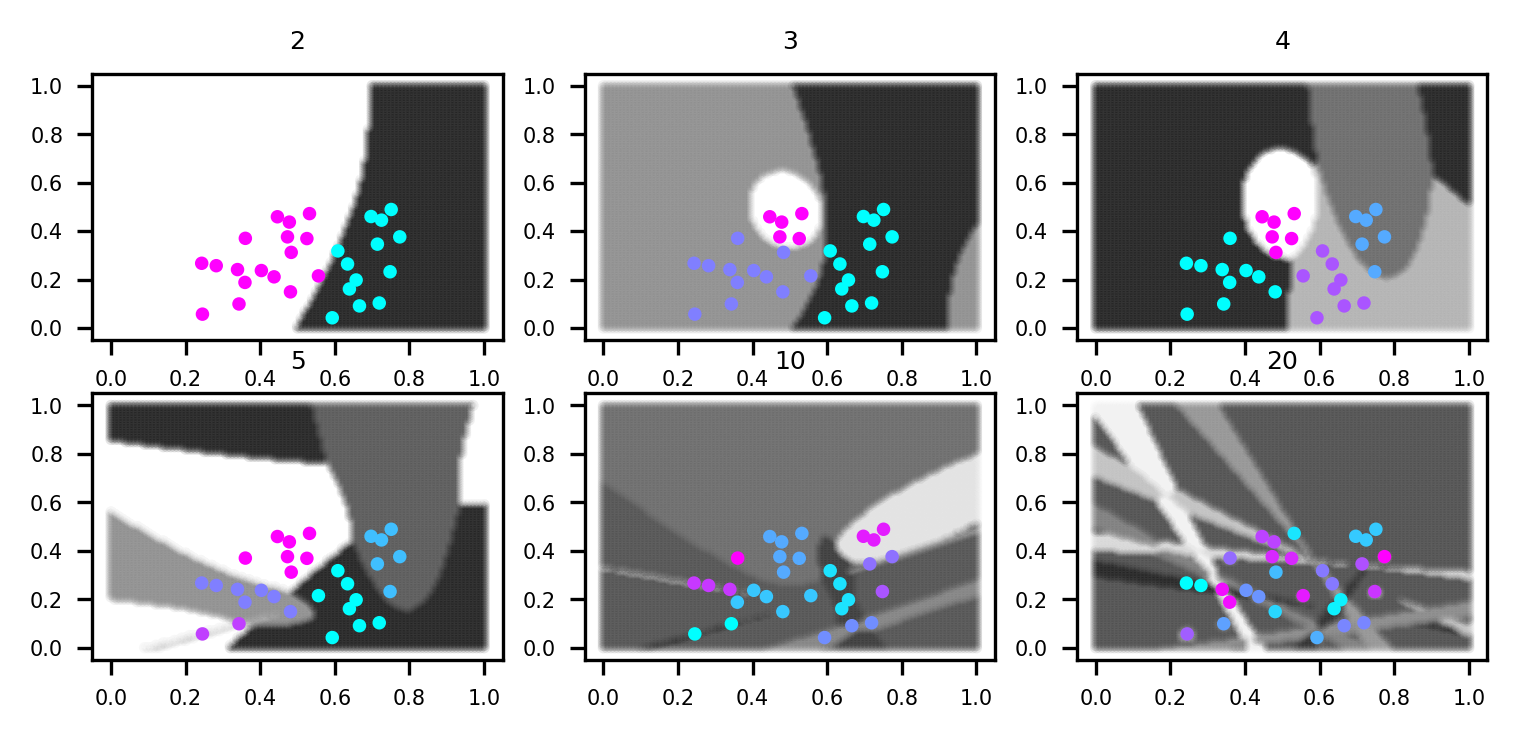

In [28]:
plt.rcParams['figure.dpi']=300
plt.rcParams['font.size']=5
for cluster_i,draw_i in zip([2,3,4,5,10,20],range(1, 1000)):
    model = mixture.GaussianMixture(n_components=cluster_i)
    data_gs = model.fit_predict(data[['密度','含糖率']])
    disp_predict = model.predict(disp_input)
    plt.subplot(3,3,draw_i)
    plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1, s=3)
    plt.scatter(data[['密度']], data[['含糖率']], c=data_gs, cmap='cool', s=5)
    plt.title(cluster_i)
plt.show()
